In [1]:
!pip install matplotlib seaborn scikit-learn pandas



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


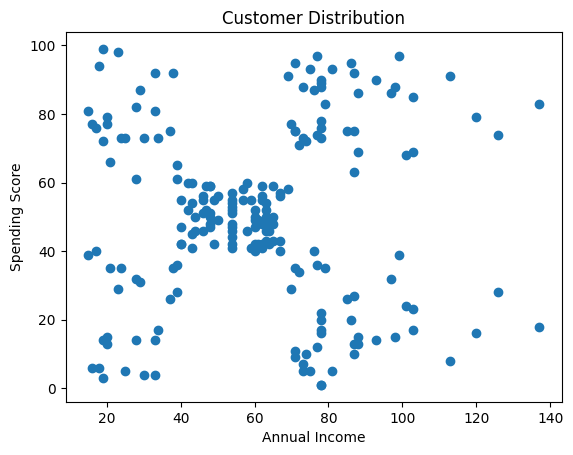

In [6]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Distribution')
plt.show()


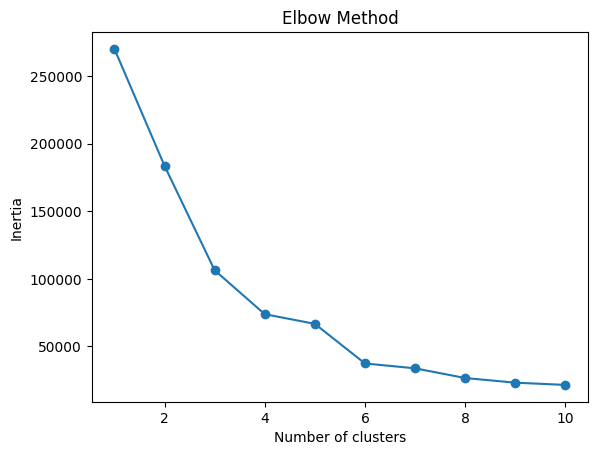

In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(X)


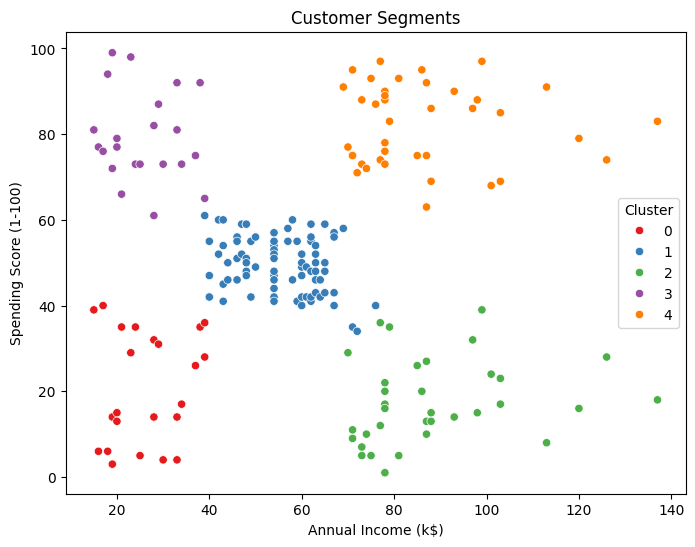

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()


In [10]:
score = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648
